# Koda za projektno nalogo PR
## Tehnični pregledi motornih vozil v Sloveniji

### Skupina
* Leon Macur - 63180190
* Kevin Mohar - 63180209

### Podatki
podatki -> (OPSI: odprti podatki) https://podatki.gov.si/dataset/rezultati-tehnicnih-pregledov-motornih-vozil \
datoteke -> Porocilo o uspesnosti tp (2019, 2018, 2017, 2016, 2015) \
txt -> tp-2019 \
csv -> tp-(2018, 2017, 2016, 2015)

### Organizacija in branje podatkov:

In [1]:
from datetime import datetime
from csv import DictReader
import numpy as np
import matplotlib.pyplot as plt
import operator
import re

def getDat(datoteka):
    dat = []
    i = 0
    with open(datoteka, "r", encoding="utf8") as datRead:
        for datLine in datRead.readlines():
            dat += [[]]
            for beseda in datLine.split(";"):
                dat[i].append(beseda.strip("\"\n"))
            i += 1
    datRead.close()
    return dat

# dats = [2019, 2018, 2017, 2016, 2015]
dats = [getDat('podatki/Porocilo_o_uspesnosti_tp_2019.txt'), getDat('podatki/Porocilo_o_uspesnosti_tp_2018.csv'),
        getDat('podatki/Porocilo_o_uspesnosti_tp_2017.csv'), getDat('podatki/Porocilo_o_uspesnosti_tp_2016.csv'), 
        getDat('podatki/Porocilo_o_uspesnosti_tp_2015.csv')]

# dat[0] <- header
# dat[#>0] <- vrstica (podatki) o vozilu

#### Vpr1:
Primerjava tipov osebnih vozil čez leta.

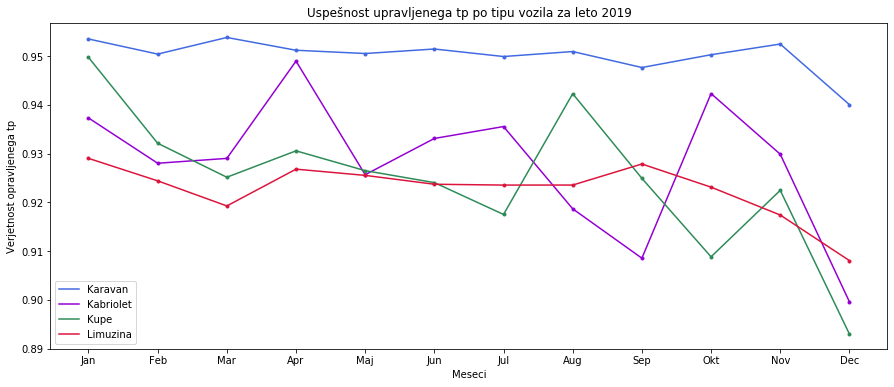

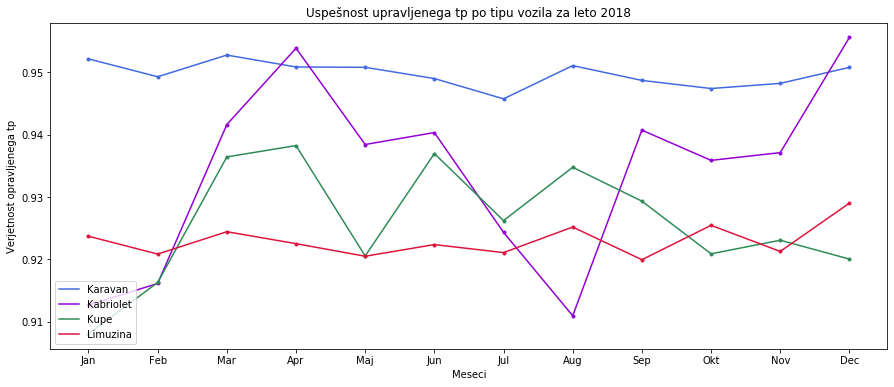

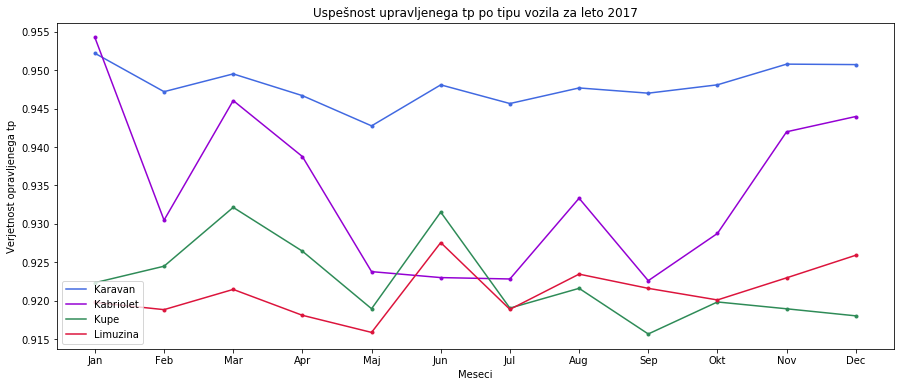

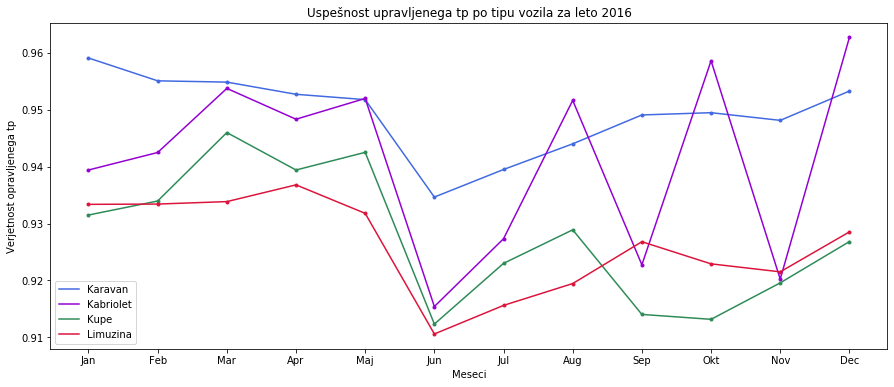

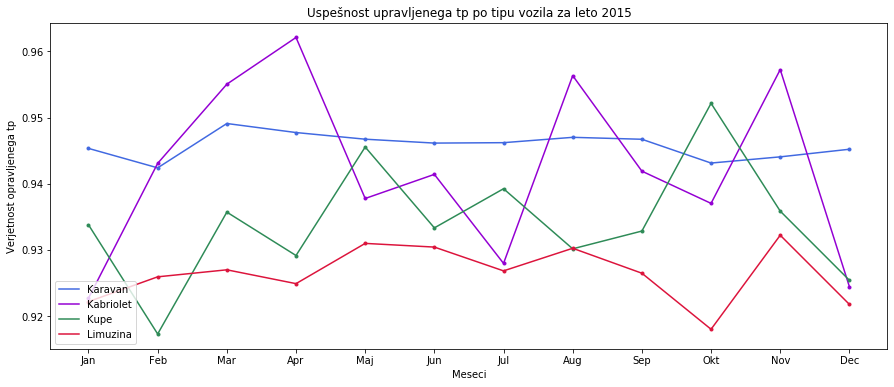

In [2]:
# dat[#>0][0] <- Znamka vozila
# dat[#>0][9] <- Tip vozila
# dat[#>0][19] <- Datum pregleda
# dat[#>0][21] <- Status tehničnega pregleda

for range_dat in range(5):
    dictTip = {}
    for i in range (1,13):
        dictTip[i] = {"kar":[0, 0], "kab":[0, 0], "kup":[0, 0], "lim":[0, 0]}

    for vozilo in dats[range_dat]:
            try:
                if range_dat == 0 or range_dat == 4:
                    datum = datetime.strptime(vozilo[19], "%m/%d/%Y").date().month
                else:
                    datum = datetime.strptime(re.sub("[ ]", "", vozilo[19]), "%d.%m.%Y").date().month
                if vozilo[9] == "karavan":
                    # Ali je vozilo opravil tp
                    if vozilo[21] == "brezhiben" or vozilo[21] == "pogojno brezhiben":
                        dictTip[datum]["kar"][0] = dictTip[datum]["kar"][0] + 1
                        dictTip[datum]["kar"][1] = dictTip[datum]["kar"][1] + 1
                    else:
                        dictTip[datum]["kar"][1] = dictTip[datum]["kar"][1] + 1
                elif vozilo[9] == "kabriolet":
                    # Ali je vozilo opravil tp
                    if vozilo[21] == "brezhiben" or vozilo[21] == "pogojno brezhiben":
                        dictTip[datum]["kab"][0] = dictTip[datum]["kab"][0] + 1
                        dictTip[datum]["kab"][1] = dictTip[datum]["kab"][1] + 1
                    else:
                        dictTip[datum]["kab"][1] = dictTip[datum]["kab"][1] + 1
                elif vozilo[9] == "kupe":
                    # Ali je vozilo opravil tp
                    if vozilo[21] == "brezhiben" or vozilo[21] == "pogojno brezhiben":
                        dictTip[datum]["kup"][0] = dictTip[datum]["kup"][0] + 1
                        dictTip[datum]["kup"][1] = dictTip[datum]["kup"][1] + 1
                    else:
                        dictTip[datum]["kup"][1] = dictTip[datum]["kup"][1] + 1
                elif vozilo[9] == "limuzina":
                    # Ali je vozilo opravil tp
                    if vozilo[21] == "brezhiben" or vozilo[21] == "pogojno brezhiben":
                        dictTip[datum]["lim"][0] = dictTip[datum]["lim"][0] + 1
                        dictTip[datum]["lim"][1] = dictTip[datum]["lim"][1] + 1
                    else:
                        dictTip[datum]["lim"][1] = dictTip[datum]["lim"][1] + 1
            except:
                pass


    # Izračunamo verjetnosti upravljenega tp za gorvia (po mesecih)
    dictTip = {key : [v["kar"][0] / v["kar"][1], v["kab"][0] / v["kab"][1],
                      v["kup"][0] / v["kup"][1], v["lim"][0] / v["lim"][1]] for key, v in dictTip.items()}

    meseci = ["Jan", "Feb", "Mar", "Apr", "Maj", "Jun", "Jul", "Aug", "Sep", "Okt", "Nov", "Dec"]

    fig, ax = plt.subplots(figsize=(15, 6))

    ax.plot(meseci, [v[0] for k, v in dictTip.items()], "k.", color="royalblue")
    ax.plot(meseci, [v[0] for k, v in dictTip.items()], color="royalblue", label="Karavan")
    
    ax.plot(meseci, [v[1] for k, v in dictTip.items()], "k.", color="darkviolet")
    ax.plot(meseci, [v[1] for k, v in dictTip.items()], color="darkviolet", label="Kabriolet")
    
    ax.plot(meseci, [v[2] for k, v in dictTip.items()], "k.", color="seagreen")
    ax.plot(meseci, [v[2] for k, v in dictTip.items()], color="seagreen", label="Kupe")
    
    ax.plot(meseci, [v[3] for k, v in dictTip.items()], "k.", color="crimson")
    ax.plot(meseci, [v[3] for k, v in dictTip.items()], color="crimson", label="Limuzina")

    ax.set_title("Uspešnost upravljenega tp po tipu vozila za leto " + str(2019-range_dat))
    ax.set_xlabel("Meseci")
    ax.set_ylabel("Verjetnost opravljenega tp")
    plt.legend(loc="lower left")
    plt.show()